In [1]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import time

train_data = lgb.Dataset("data/kddb/kddb")
test_data = lgb.Dataset("data/kddb.t/kddb.t")

In [2]:
# 存储记录的数据结构
history = {'time': [], 'auc': []}
start_time = time.time()

# 自定义回调函数
def record_auc_time(env):
    """ 记录每次迭代的时间和AUC """
    # 计算当前累计时间
    current_time = time.time() - start_time
    
    # 从评估结果中提取验证集的AUC值（这里使用第一个验证集）
    if env.evaluation_result_list:
        auc_value = env.evaluation_result_list[0][2]
        history['time'].append(current_time)
        history['auc'].append(auc_value)

In [ ]:
# 配置参数# lgb full
history = {'time': [], 'auc': []}
start_time = time.time()

params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "data_sample_strategy": "goss",
    "min_child_weight":3000,
    "num_leaves": 255,
    "min_data_in_leaf":1000,
    "learning_rate": 0.1,
    "top_rate":0.05,
    "other_rate":0.05,
    "force_row_wise":True,
}

# 执行训练
model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=100,
    callbacks=[
        record_auc_time,  
        lgb.log_evaluation(period=1)
    ]
)
history_lgbfull = history

[LightGBM] [Info] Number of positive: 16579660, number of negative: 2684437
[LightGBM] [Info] Total Bins 118071
[LightGBM] [Info] Number of data points in the train set: 19264097, number of used features: 43702
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.860651 -> initscore=1.820706
[LightGBM] [Info] Start training from score 1.820706
[1]	valid_0's auc: 0.74574
[2]	valid_0's auc: 0.747569
[3]	valid_0's auc: 0.752593
[4]	valid_0's auc: 0.754773
[5]	valid_0's auc: 0.757732
[6]	valid_0's auc: 0.759509
[7]	valid_0's auc: 0.761436
[8]	valid_0's auc: 0.76256
[9]	valid_0's auc: 0.763464
[10]	valid_0's auc: 0.76415
[11]	valid_0's auc: 0.765371
[12]	valid_0's auc: 0.766431
[13]	valid_0's auc: 0.767431
[14]	valid_0's auc: 0.768107
[15]	valid_0's auc: 0.768772
[16]	valid_0's auc: 0.769444
[17]	valid_0's auc: 0.770322
[18]	valid_0's auc: 0.770784
[19]	valid_0's auc: 0.771206
[20]	valid_0's auc: 0.771683
[21]	valid_0's auc: 0.77223
[22]	valid_0's auc: 0.772673
[23

In [4]:
# 配置参数# lgb efb
history = {'time': [], 'auc': []}
start_time = time.time()

params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "min_child_weight":3000,
    "num_leaves": 255,
    "min_data_in_leaf":1000,
    "learning_rate": 0.1,
    "force_row_wise":True,
}

# 执行训练
model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=100,
    callbacks=[
        record_auc_time,  
        lgb.log_evaluation(period=1)  
    ]
)
history_lgbefb = history

[LightGBM] [Info] Number of positive: 16579660, number of negative: 2684437
[LightGBM] [Info] Total Bins 118071
[LightGBM] [Info] Number of data points in the train set: 19264097, number of used features: 43702
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.860651 -> initscore=1.820706
[LightGBM] [Info] Start training from score 1.820706
[1]	valid_0's auc: 0.74574
[2]	valid_0's auc: 0.747569
[3]	valid_0's auc: 0.752593
[4]	valid_0's auc: 0.754773
[5]	valid_0's auc: 0.757732
[6]	valid_0's auc: 0.759509
[7]	valid_0's auc: 0.761436
[8]	valid_0's auc: 0.76256
[9]	valid_0's auc: 0.763464
[10]	valid_0's auc: 0.76415
[11]	valid_0's auc: 0.76509
[12]	valid_0's auc: 0.766107
[13]	valid_0's auc: 0.76696
[14]	valid_0's auc: 0.767919
[15]	valid_0's auc: 0.768464
[16]	valid_0's auc: 0.769167
[17]	valid_0's auc: 0.769827
[18]	valid_0's auc: 0.770525
[19]	valid_0's auc: 0.771078
[20]	valid_0's auc: 0.771563
[21]	valid_0's auc: 0.771929
[22]	valid_0's auc: 0.772346
[23]	valid_0's auc: 0.772801
[24]

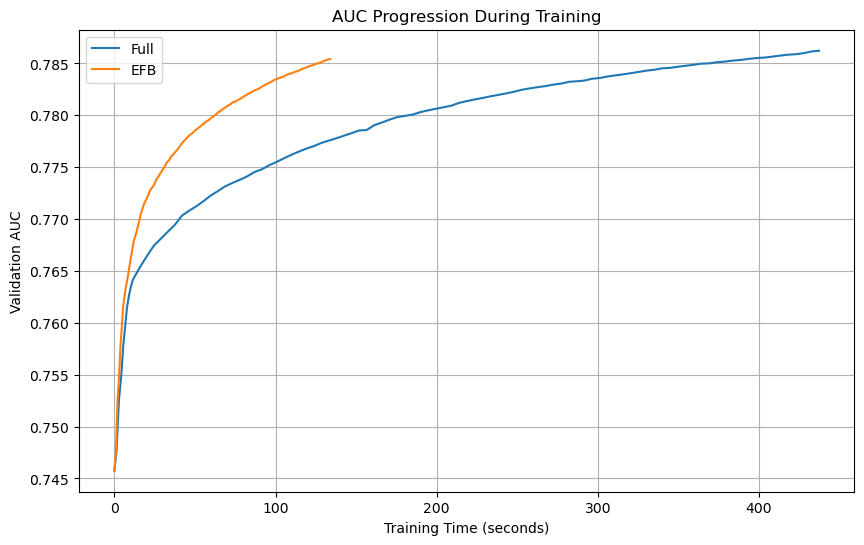

In [7]:
# 绘制时间-AUC曲线
plt.figure(figsize=(10, 6))
plt.plot(np.array(history_lgbfull['time'])-history_lgbfull['time'][0], history_lgbfull['auc'],label='Full')
plt.plot(np.array(history_lgbefb['time'])-history_lgbefb['time'][0], history_lgbefb['auc'],label='EFB')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Validation AUC')
plt.title('AUC Progression During Training')
plt.legend()
plt.grid(True)

plt.show()